### Importing PIL and using it for image manipulation

In [63]:
import PIL
from PIL import Image, ImageFilter, ImageEnhance, ImageSequence
import numpy as np
import secrets
import matplotlib.pyplot as plt

np.set_printoptions(precision=4,threshold=5,edgeitems=2)

### Loading an image in memory.
Image is the main class of PIL which is responsible for representing an image. Whenever you load an image in memory using PIL it'll be of class Image.

open() method is used to open a file. This method loads file lazily as it reads the header of an image file to find out image format, mode, and size. It does not load the whole image into memory which can be of few MB for images with higher resolution. This can be helpful to find out image metadata without loading it in memory.


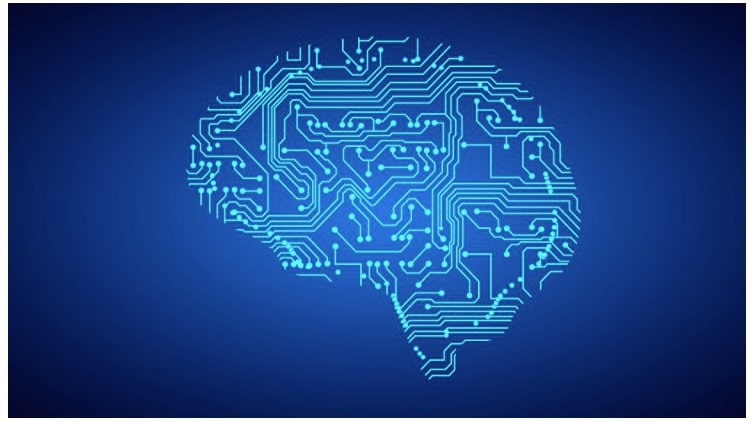

In [64]:
Image.open('data/ml.jpeg')

In [65]:
img = Image.open('data/coca-cola-logo.png')
type(img)
(img.size,img.mode, img.format, img.info)

((700, 700),
 'RGB',
 'PNG',
 {'srgb': 0, 'gamma': 0.45455, 'dpi': (119.9896, 119.9896)})

-  **size** attribute of Image instance refers to the size of the image in pixels. (width, height)
- **mode** attribute refers to in which mode image is loaded which is generally RGB, RGBA, CMYK, L, etc. One can get more information about mode, pallette, bands, etc over here
- **format** refers to the format of the source file from which image was loaded, It'll be None for an image generated after processing an original image. One can read about formats supported over here

(array([122.,   6., ...,   0.,   0.]),
 array([  0.    ,   0.9961, ..., 254.0039, 255.    ]),
 <BarContainer object of 256 artists>)

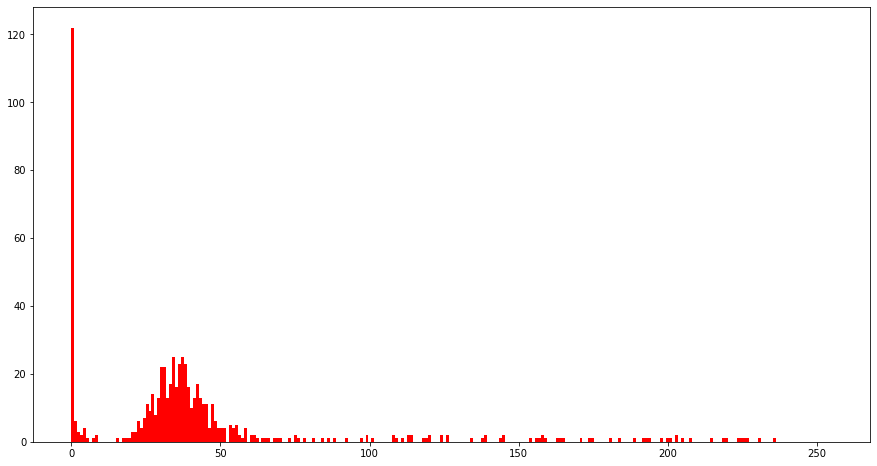

In [66]:
plt.figure(figsize=(15,8))
plt.hist(img.histogram(),bins=256,range=(0,255),color='red', label='Density of pixels within image')

- **show()** function saves the image and then loads it in default image application on the machine.
- **convert()** function is used to convert an image from one mode to another. Currently conversion only between images with mode types 'L', 'RGB' and 'CMYK'

In [67]:
img = img.convert('L')
img.show()

### Save image using Image class instance method save()
It's required to provide the file format in which to save the file. We can give format as a parameter to **save()** method or we can include it in the filename as well. **save()** method will fail if the format is not provided as part of a file name or as format parameter.

In [68]:
img.save('img_rgb.jpg'); img.save('temp',format="jpeg")

### Creating thumbnail
- We can use **thumbnail()** method of Image class to create thumbnail from an image. We need to provide a size parameter as a tuple (height, width).PIL will create an image that has the same aspect ratio as the original image. The resulting thumbnail will not be the same size as you provided as parameter. But it'll not be larger than that size.
- Also make a note that **thumbnail()** method works **in-place** which means that it'll modify original image object rather than returning a new modified object.
- one can use **size** attribute of Image class to check the size of the resulting image after converting to thumbnail.
- **size** attribute of Image class always returns tuple in format (width, height).

In [69]:
img.thumbnail((128,128))
img.size

(128, 128)

### Resizing Image
**resize()** method is used to resize the method. It requires a new size of an image as a tuple first parameter. One can maximize and minimize image using this method.

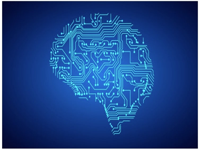

In [70]:
img = Image.open('data/ml.jpeg').resize((380,250))
img.resize((200,150))

### Cropping Image
- **crop()** method is used to crop a particular part of an image. It requires a tuple of 4 integers (left, upper, right, lower). This number must be within a range of size of image otherwise error will be raised while cropping. Image is represented using a coordinated system with (0,0) as upper-left corner and (width, height) as a lower-right corner.

- **crop()** method is lazy as it does not actually crop image until **load()** function is called to load a cropped image.

    - One can find width and height of resulting image using below formula:
        - width = right - left, height = lower - upper.
        
- **size** attribute of Image class always returns tuple in format (width, height).

size of cropped image : (150, 50)


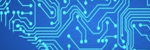

In [71]:
cropped_img = img.crop((100,100,250,150))
print('size of cropped image : %s'%str(cropped_img.size))
cropped_img

### Flip/Rotate an Image
- **transpose()** function is used to flip/rotate image in various angles. Various flip/rotate types are Image.FLIP_LEFT_RIGHT, Image.FLIP_TOP_BOTTOM, Image.ROTATE_180, Image.ROTATE_90, Image.ROTATE_270, Image.TRANSPOSE and Image.TRANSVERSE

- **rotate()** function is used to rotate the image by certain degrees. It takes on a parameter which must be between (0,360).

/Users/geneous/anaconda3/envs/main/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: FLIP_TOP_BOTTOM is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.FLIP_TOP_BOTTOM instead.
  """Entry point for launching an IPython kernel.


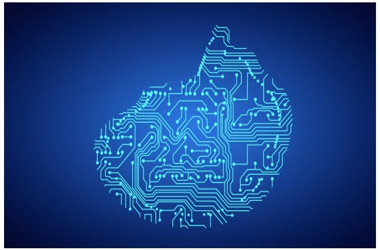

In [72]:
img.transpose(Image.FLIP_TOP_BOTTOM)

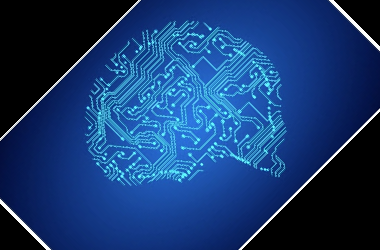

In [73]:
img.rotate(45)

### Converting Image object to numpy array and vice-versa
- We can directly give Image class instance as input to **numpy.array()** method. It'll convert image to numpy array based on mode and it'll create channels accordingly.

- We can create Image instance from numpy array again with **Image.fromarray()** function.

In [74]:
nparr = np.array(img)
nparr.shape, nparr.dtype, nparr

((250, 380, 3),
 dtype('uint8'),
 array([[[255, 255, 252],
         [255, 255, 254],
         ...,
         [255, 254, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 254, 255],
         ...,
         [255, 254, 255],
         [255, 255, 255]],
 
        ...,
 
        [[255, 255, 255],
         [255, 255, 255],
         ...,
         [254, 255, 253],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 253],
         ...,
         [255, 255, 253],
         [255, 255, 255]]], dtype=uint8))

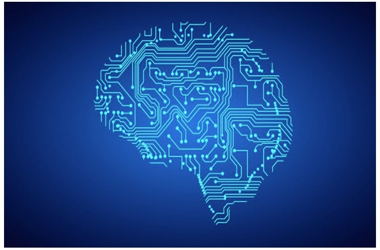

In [75]:
img2 = Image.fromarray(nparr); Image.fromarray(nparr)

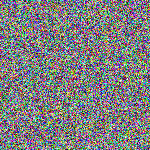

In [76]:
Image.fromarray(np.random.randint(0,255,size=(150, 150, 3), dtype=np.uint8))

### Create image from bytes and vice-versa.
- **frombytes()** function allows us to create an image from a byte stream.
- We need to specify the mode, size of image and data.
- Please make a note that for RGB, RGBA modes, image data should be provided for all channels but size will be (width, height) only.
- **tobytes()** function is used to create a byte stream from an image.

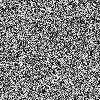

In [77]:
Image.frombytes('L', size=(100,100), data = secrets.token_bytes(10000))

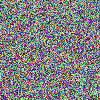

In [78]:
Image.frombytes('RGB', size=(100,100), data = secrets.token_bytes(30000))

In [79]:
Image.frombytes('RGBA', size=(100,100), data = secrets.token_bytes(40000));

Size of bytes : 285000
Image byte size from dimensions 285000


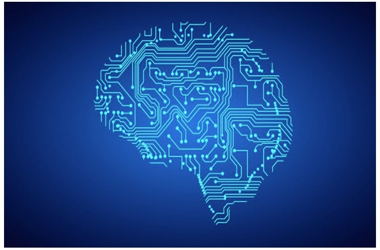

In [80]:
byte_stream = img.tobytes()
print('Size of bytes : %d'%len(byte_stream))
print('Image byte size from dimensions %d'%(img.size[0]*img.size[1]*len(img.getbands())))
Image.frombytes(img.mode, img.size, byte_stream)

### Splitting image into bands and merging bands in various order
- **split()** method is used to split methods into bands which will (R,G,B) for RGB, (R,G,B,A) for RGBA, (C,M,Y,K) for CMYK and (L,) for L (Luminescence). Each of the bands returned itself will be an instance of Image class again so it makes easy to work on parts and then combine again.

- **merge()** is used to merge different bands and create one unified image of those bands. It takes the first parameter as mode and the second parameter as tuple containing bands according to mode. bands must have the same size in order for a merge to work correctly.

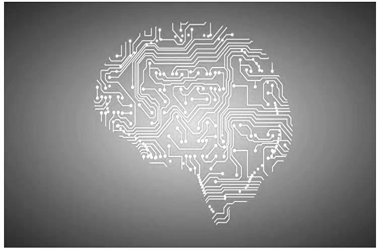

In [81]:
img =img.convert('RGB')
r, g, b = img.split()
Image.merge('L', (b,))

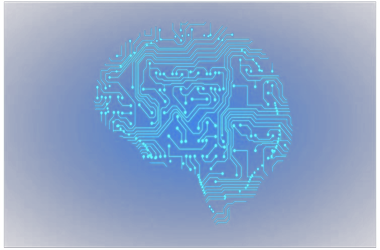

In [82]:
Image.merge('RGBA', (r, g, b, b))

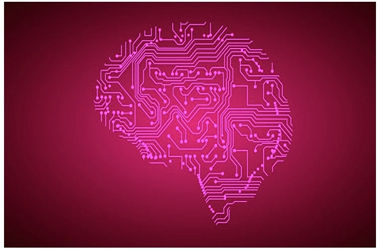

In [83]:
Image.merge('RGB', (b, r, g))

### Pasting images into another image
- **paste()** method is used to paste cropped image/image to another image.
- User needs to provide place where to paste the image with a tuple (left, upper, right, lower). Users can only provide (left, upper) as well for place and it'll work fine.
- One can also use mask which can be used to make pasted images with transparency. The masked image will have values between (0, 255) with 0 values being totally transparent and 255 is opaque.
- One can use this function to create a collage.

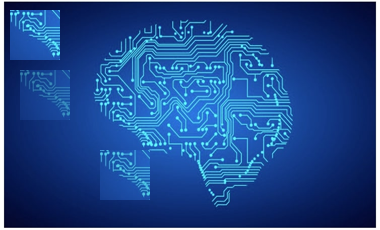

In [84]:
img = Image.open('data/ml.jpeg').resize((380,230))
cropped_region = img.crop((100,100,150,150))
img.paste(cropped_region,box=(10,10,60,60))
img.paste(cropped_region,box=(20,70,70,120),mask=Image.fromarray((np.zeros(cropped_region.size)+120).astype(np.uint8)))
img.paste(cropped_region,box=(100,150,150,200),mask=Image.fromarray((np.zeros(cropped_region.size)+200).astype(np.uint8)))
img


### Applying various filters on image for effects
- **filter()** method is used to apply various filters on an image like a blur, smooth, emboss, etc. It accepts one argument which is a filter. The filter is from class **ImageFilter**.
- All effects generate by doing convolution operation on the image.Read about convolution to get idea about it.
- All effects have (3,3) or (5,5) kernel which gets convolved on the image. Kernel refers to an array of that size.

Kernel Size : (5, 5)
Kernel : [[1 1 ... 1 1]
 [1 0 ... 0 1]
 ...
 [1 0 ... 0 1]
 [1 1 ... 1 1]]


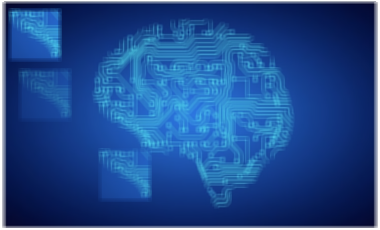

In [85]:
kernel_size = ImageFilter.BLUR.filterargs[0]
print('Kernel Size : %s'%str(kernel_size))
print('Kernel : %s'%str(np.array(ImageFilter.BLUR.filterargs[3]).reshape(kernel_size)))
img.filter(ImageFilter.BLUR)

Kernel Size : (3, 3)
Kernel : [[-1  0  0]
 [ 0  1  0]
 [ 0  0  0]]


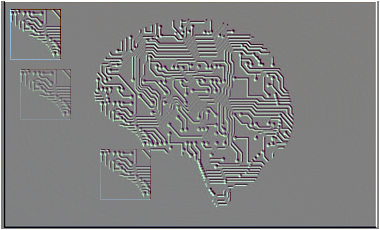

In [86]:
kernel_size = ImageFilter.EMBOSS.filterargs[0]
print('Kernel Size : %s'%str(kernel_size))
print('Kernel : %s'%str(np.array(ImageFilter.EMBOSS.filterargs[3]).reshape(kernel_size)))
img.filter(ImageFilter.EMBOSS)

Kernel Size : (3, 3)
Kernel : [[1 1 1]
 [1 5 1]
 [1 1 1]]


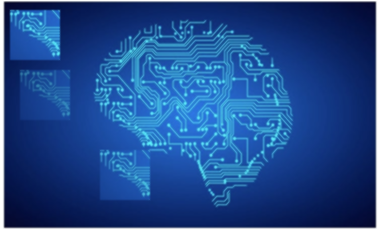

In [87]:
kernel_size = ImageFilter.SMOOTH.filterargs[0]
print('Kernel Size : %s'%str(kernel_size))
print('Kernel : %s'%str(np.array(ImageFilter.SMOOTH.filterargs[3]).reshape(kernel_size)))
img.filter(ImageFilter.SMOOTH)

Kernel Size : (3, 3)
Kernel : [[-1 -1 -1]
 [-1  8 -1]
 [-1 -1 -1]]


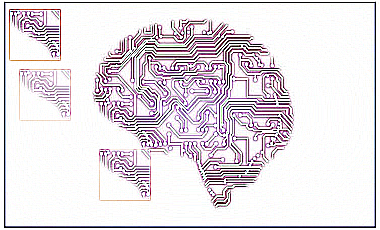

In [88]:
kernel_size = ImageFilter.CONTOUR.filterargs[0]
print('Kernel Size : %s'%str(kernel_size))
print('Kernel : %s'%str(np.array(ImageFilter.CONTOUR.filterargs[3]).reshape(kernel_size)))
img.filter(ImageFilter.CONTOUR)

### Manipulating individual pixels of image
- **point()** function is used to manipulate individual pixels of an image. It takes as input function which takes 1 argument which is pixel value.

- One can work on individual bands of image and then combine bands to generate a combined image.

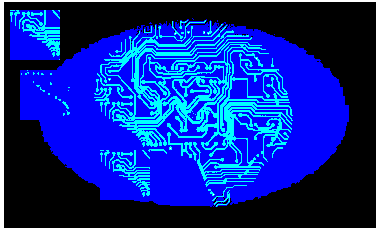

In [89]:
img.point(lambda x: 0 if x < 120 else 255)

[<PIL.Image.Image image mode=L size=380x230 at 0x7F9DD159EDD0>, <PIL.Image.Image image mode=L size=380x230 at 0x7F9DD159E150>, <PIL.Image.Image image mode=L size=380x230 at 0x7F9DE1D57790>]


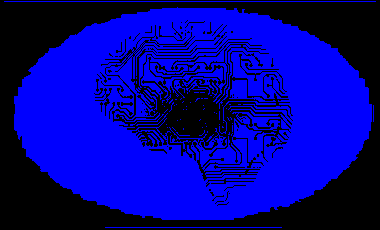

In [90]:
img = Image.open('data/ml.jpeg').resize((380,230))
bands = list(img.split())
print(bands)

bands[0] = bands[0].point(lambda x: x > 120 and 0)
bands[1] = bands[1].point(lambda x: x < 120 and 0)
bands[2] = bands[2].point(lambda x: x > 100 and x < 200 and 255)
Image.merge('RGB',bands)


### Enhance image by changing contrast/brightness/color balance/ sharpness
- **ImageEnhance** class has various functionalities(Brightness, Color, Contrast, Sharpness) which allows user to enhance an image in various ways
- All of them take **Image** instance as input and returns an instance of effect.
- Returned effect instance has a method called **enhance()** which takes float value between [0.0, 1.0] to represent percent application of the effect.
- Value of 0.0 for Color effect returns a black and white image.

<class 'PIL.ImageEnhance.Brightness'>


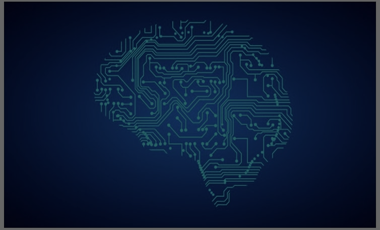

In [91]:
img = Image.open('data/ml.jpeg').resize((380,230))
img = ImageEnhance.Brightness(img)
print(type(img))
img.enhance(0.4)

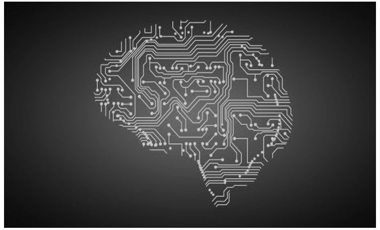

In [92]:
img = Image.open('data/ml.jpeg').resize((380,230))
img = ImageEnhance.Color(img)
img.enhance(0.0)

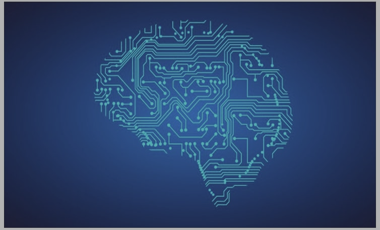

In [93]:
img = Image.open('data/ml.jpeg').resize((380,230))
img = ImageEnhance.Contrast(img)
img.enhance(0.6)

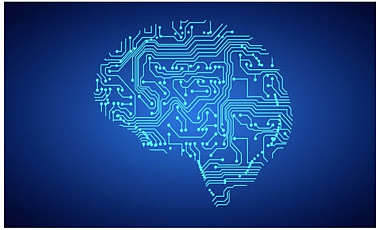

In [94]:
img = Image.open('data/ml.jpeg').resize((380,230))
img = ImageEnhance.Sharpness(img)
img.enhance(2.0)

### Lightening Image

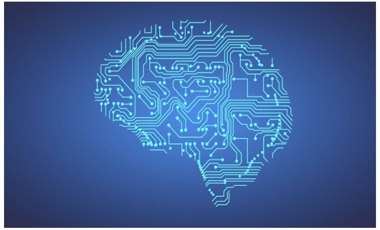

In [95]:
img = Image.open('data/ml.jpeg').resize((380,230))
def lighten_image(img, delta):
    if delta >=0 and delta <=255:
        white_image = Image.fromarray(np.zeros((img.size[1],img.size[0]),dtype=np.uint8)+255)
        mask = Image.fromarray(np.zeros((img.size[1],img.size[0]),dtype=np.uint8)+delta)
        #print(mask.size, white_image.size,img.size)
        img.paste(white_image,mask=mask)
    else:
        print('please enter values between 0-255')
    return img
lighten_image(img,40)